In [1]:
#imports
import pandas as pd 
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt

In [2]:
# set the display option
pd.set_option('display.max_columns', 91)
pd.set_option('display.max_rows',40)
pd.options.display.float_format = '{:,.0f}'.format

In [3]:
# read the dataset using pandas dataframe
data = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv', parse_dates=['Date'],low_memory=False)

In [4]:
# check the shape
data.shape

(35032, 91)

In [5]:
# overall info: missing values, inappropriate column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35032 entries, 0 to 35031
Data columns (total 91 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    35032 non-null  datetime64[ns]
 1   MMWR_week                               35032 non-null  int64         
 2   Location                                35032 non-null  object        
 3   Distributed                             35032 non-null  object        
 4   Distributed_Janssen                     35032 non-null  object        
 5   Distributed_Moderna                     35032 non-null  object        
 6   Distributed_Pfizer                      35032 non-null  object        
 7   Distributed_Unk_Manuf                   35032 non-null  object        
 8   Dist_Per_100K                           35032 non-null  object        
 9   Distributed_Per_100k_5Plus              34584 non-

In [6]:
# before dealing with missing values, check for duplicates: all good
data.duplicated().sum()

0

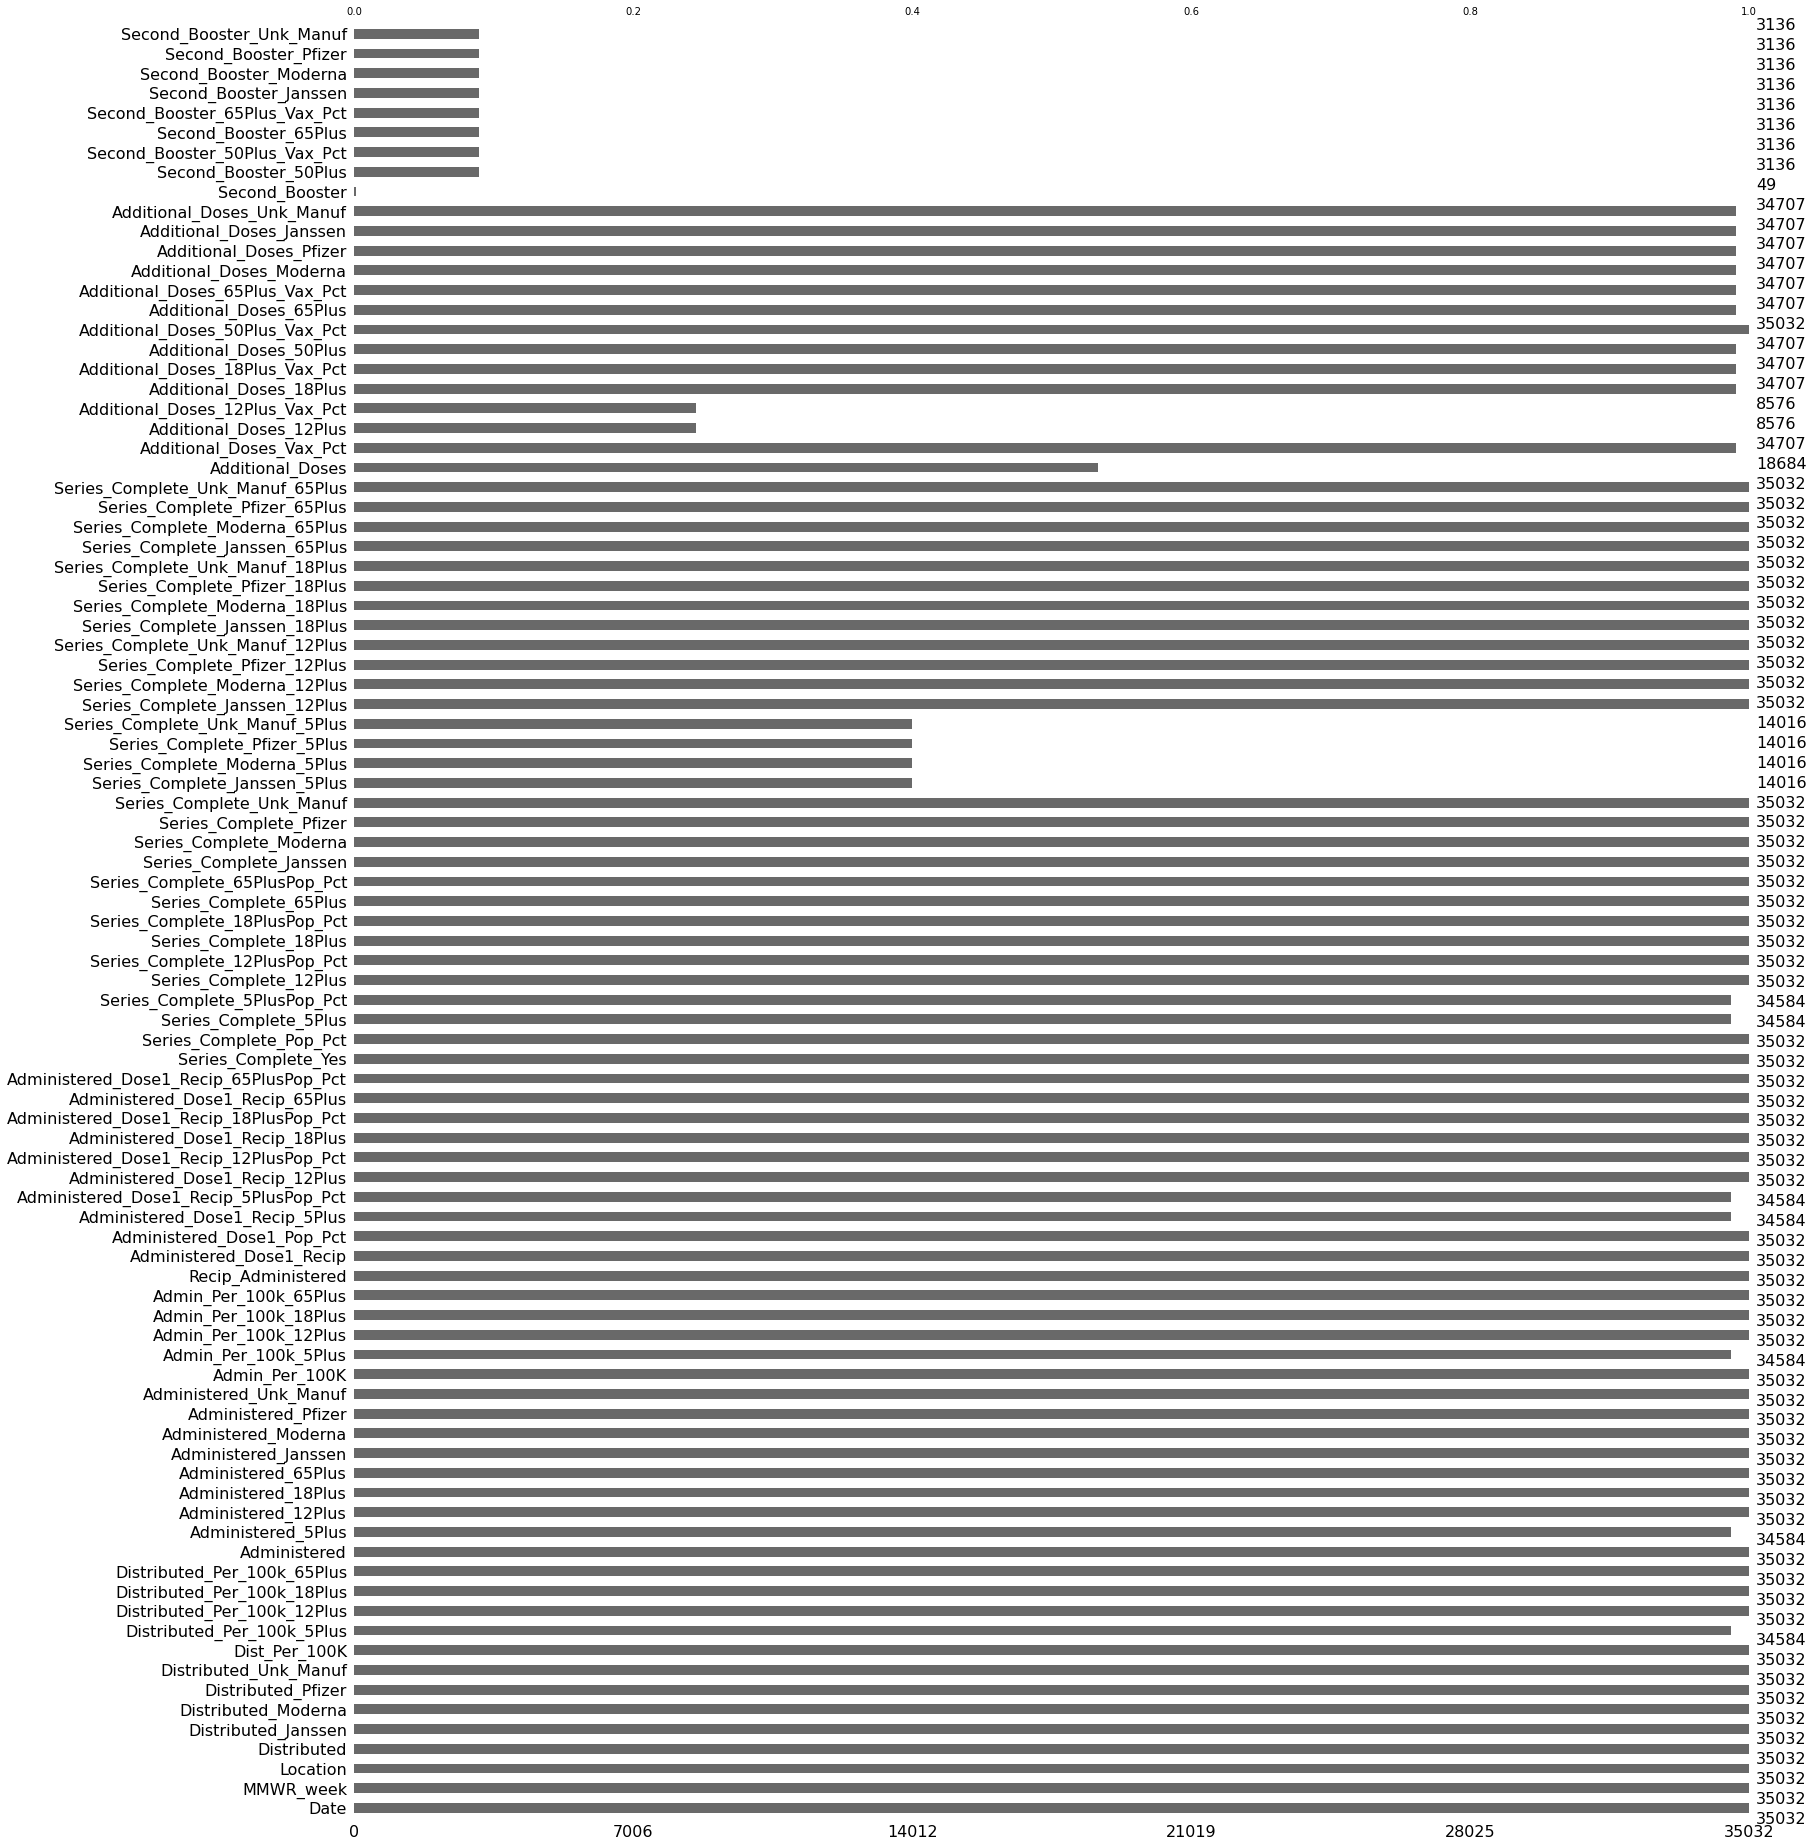

In [7]:
# visualize missing values using a simple bar plot
msno.bar(data)
plt.show()

In [8]:
# have a first look on the data
data.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,Distributed_Per_100k_12Plus,Distributed_Per_100k_18Plus,Distributed_Per_100k_65Plus,Administered,Administered_5Plus,Administered_12Plus,Administered_18Plus,Administered_65Plus,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf,Admin_Per_100K,Admin_Per_100k_5Plus,Admin_Per_100k_12Plus,Admin_Per_100k_18Plus,Admin_Per_100k_65Plus,Recip_Administered,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Series_Complete_Janssen,Series_Complete_Moderna,Series_Complete_Pfizer,Series_Complete_Unk_Manuf,Series_Complete_Janssen_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Unk_Manuf_5Plus,Series_Complete_Janssen_12Plus,Series_Complete_Moderna_12Plus,Series_Complete_Pfizer_12Plus,Series_Complete_Unk_Manuf_12Plus,Series_Complete_Janssen_18Plus,Series_Complete_Moderna_18Plus,Series_Complete_Pfizer_18Plus,Series_Complete_Unk_Manuf_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Series_Complete_Unk_Manuf_65Plus,Additional_Doses,Additional_Doses_Vax_Pct,Additional_Doses_12Plus,Additional_Doses_12Plus_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct,Additional_Doses_Moderna,Additional_Doses_Pfizer,Additional_Doses_Janssen,Additional_Doses_Unk_Manuf,Second_Booster,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,Second_Booster_Janssen,Second_Booster_Moderna,Second_Booster_Pfizer,Second_Booster_Unk_Manuf
0,2022-06-09,23,PW,"46,290","3,800","30,000","12,490",0,"214,982","227,212","248,270","279,141","2,323,800","48,164","48,160","45,661","42,059","5,167","2,349","36,962","8,728",125,"223,686","236,391","244,897","253,627","259,388","48,530","20,447",95,"20,444",95,"19,041",95,"17,512",95,"1,871",94,"18,200",84,"18,199",89,"17,148",92,"15,708",95,"1,806",91,"2,354","12,683","3,102",61,"2,354","12,683","3,101",61,"2,354","12,683","2,050",61,"2,354","12,683",610,61,227,"1,540",37,2,"11,584",64,"11,537",67,"10,893",69,"4,693",78,"1,549",86,"10,627",957,0,0,NaN,616,13,237,15,0,629,9,0
1,2022-06-09,23,US,"754,073,055","30,913,500","280,553,820","442,605,735",0,"227,124","241,485","265,968","291,982","1,376,250","590,076,511","589,878,289","570,655,850","533,819,055","152,674,526","18,791,038","222,606,034","348,097,820","581,619","177,729","188,903","201,275","206,698","278,644","590,076,511","258,853,549",78,"258,720,845",83,"248,361,178",88,"230,758,379",89,"57,018,478",95,"221,601,089",67,"221,534,348",71,"213,103,867",75,"198,011,560",77,"49,983,779",91,"17,011,191","77,043,197","127,383,109","163,592","17,008,097","77,039,986","127,322,936","163,329","17,006,062","77,036,505","118,900,648","160,652","16,978,918","76,952,679","103,926,073","153,890","2,364,479","23,821,597","23,729,625","68,078","104,160,225",47,"103,815,005",49,"99,845,658",50,"63,076,398",62,"34,873,125",70,"44,469,701","58,127,120","1,527,689","35,715","15,955,028","15,208,582",24,"10,619,959",30,"15,837","7,631,542","8,295,655","11,994"
2,2022-06-09,23,SC,"10,925,375","456,700","4,587,540","5,881,135",0,"212,196","224,976","247,182","270,595","1,165,970","7,691,681","7,686,863","7,508,367","7,110,620","

In [9]:
# count missing values
data.isnull().sum()

Date                                 0
MMWR_week                            0
Location                             0
Distributed                          0
Distributed_Janssen                  0
                                 ...  
Second_Booster_65Plus_Vax_Pct    31896
Second_Booster_Janssen           31896
Second_Booster_Moderna           31896
Second_Booster_Pfizer            31896
Second_Booster_Unk_Manuf         31896
Length: 91, dtype: int64

In [10]:
# check the location column values
data['Location'].value_counts().sort_index()

AK    543
AL    543
AR    543
AS    544
AZ    543
     ... 
VT    543
WA    543
WI    543
WV    543
WY    543
Name: Location, Length: 66, dtype: int64

In [11]:
# keep the rows for the main 50 states in the USA and removing everything else
values = ['AS','BP2','DC','DD2','FM','GU','PW','US','VI','IH2','LTC','MH','MP','PR','RP','VA2']
data = data[data.Location.isin(values) == False]

In [12]:
# check the shape after removing the rows
data.shape

(27150, 91)

In [13]:
# check for the data types of the columns
data.dtypes

Date                             datetime64[ns]
MMWR_week                                 int64
Location                                 object
Distributed                              object
Distributed_Janssen                      object
                                      ...      
Second_Booster_65Plus_Vax_Pct           float64
Second_Booster_Janssen                   object
Second_Booster_Moderna                   object
Second_Booster_Pfizer                    object
Second_Booster_Unk_Manuf                 object
Length: 91, dtype: object

In [14]:
# removing the commas from the columns
data.replace(',','', regex=True, inplace=True)

In [15]:
# changing the data type for these columns to numerical data type
data[['Distributed', 'Distributed_Janssen','Distributed_Moderna','Distributed_Pfizer','Distributed_Unk_Manuf','Dist_Per_100K','Distributed_Per_100k_5Plus','Distributed_Per_100k_12Plus','Distributed_Per_100k_18Plus','Distributed_Per_100k_65Plus','Administered','Administered_5Plus','Administered_12Plus','Administered_18Plus','Administered_65Plus','Administered_Janssen','Administered_Moderna','Administered_Pfizer','Administered_Unk_Manuf','Admin_Per_100K','Admin_Per_100k_5Plus','Admin_Per_100k_12Plus','Admin_Per_100k_18Plus','Admin_Per_100k_65Plus','Recip_Administered','Administered_Dose1_Recip','Administered_Dose1_Pop_Pct','Administered_Dose1_Recip_5Plus','Administered_Dose1_Recip_5PlusPop_Pct','Administered_Dose1_Recip_12Plus','Administered_Dose1_Recip_12PlusPop_Pct','Administered_Dose1_Recip_18Plus','Administered_Dose1_Recip_18PlusPop_Pct','Administered_Dose1_Recip_65Plus','Administered_Dose1_Recip_65PlusPop_Pct','Series_Complete_Yes','Series_Complete_Pop_Pct','Series_Complete_5Plus','Series_Complete_5PlusPop_Pct','Series_Complete_12Plus','Series_Complete_12PlusPop_Pct','Series_Complete_18Plus','Series_Complete_18PlusPop_Pct','Series_Complete_65Plus','Series_Complete_65PlusPop_Pct','Series_Complete_Janssen','Series_Complete_Moderna','Series_Complete_Pfizer','Series_Complete_Unk_Manuf','Series_Complete_Janssen_5Plus','Series_Complete_Moderna_5Plus','Series_Complete_Pfizer_5Plus','Series_Complete_Unk_Manuf_5Plus','Series_Complete_Janssen_12Plus','Series_Complete_Moderna_12Plus','Series_Complete_Pfizer_12Plus','Series_Complete_Unk_Manuf_12Plus','Series_Complete_Janssen_18Plus','Series_Complete_Moderna_18Plus','Series_Complete_Pfizer_18Plus','Series_Complete_Unk_Manuf_18Plus','Series_Complete_Janssen_65Plus','Series_Complete_Moderna_65Plus','Series_Complete_Pfizer_65Plus','Series_Complete_Unk_Manuf_65Plus','Additional_Doses','Additional_Doses_Vax_Pct','Additional_Doses_12Plus','Additional_Doses_12Plus_Vax_Pct','Additional_Doses_18Plus','Additional_Doses_18Plus_Vax_Pct','Additional_Doses_50Plus','Additional_Doses_50Plus_Vax_Pct','Additional_Doses_65Plus','Additional_Doses_65Plus_Vax_Pct','Additional_Doses_Moderna','Additional_Doses_Pfizer','Additional_Doses_Janssen','Additional_Doses_Unk_Manuf','Second_Booster','Second_Booster_50Plus','Second_Booster_50Plus_Vax_Pct','Second_Booster_65Plus','Second_Booster_65Plus_Vax_Pct','Second_Booster_Janssen','Second_Booster_Moderna','Second_Booster_Pfizer','Second_Booster_Unk_Manuf']] = data[['Distributed', 'Distributed_Janssen','Distributed_Moderna','Distributed_Pfizer','Distributed_Unk_Manuf','Dist_Per_100K','Distributed_Per_100k_5Plus','Distributed_Per_100k_12Plus','Distributed_Per_100k_18Plus','Distributed_Per_100k_65Plus','Administered','Administered_5Plus','Administered_12Plus','Administered_18Plus','Administered_65Plus','Administered_Janssen','Administered_Moderna','Administered_Pfizer','Administered_Unk_Manuf','Admin_Per_100K','Admin_Per_100k_5Plus','Admin_Per_100k_12Plus','Admin_Per_100k_18Plus','Admin_Per_100k_65Plus','Recip_Administered','Administered_Dose1_Recip','Administered_Dose1_Pop_Pct','Administered_Dose1_Recip_5Plus','Administered_Dose1_Recip_5PlusPop_Pct','Administered_Dose1_Recip_12Plus','Administered_Dose1_Recip_12PlusPop_Pct','Administered_Dose1_Recip_18Plus','Administered_Dose1_Recip_18PlusPop_Pct','Administered_Dose1_Recip_65Plus','Administered_Dose1_Recip_65PlusPop_Pct','Series_Complete_Yes','Series_Complete_Pop_Pct','Series_Complete_5Plus','Series_Complete_5PlusPop_Pct','Series_Complete_12Plus','Series_Complete_12PlusPop_Pct','Series_Complete_18Plus','Series_Complete_18PlusPop_Pct','Series_Complete_65Plus','Series_Complete_65PlusPop_Pct','Series_Complete_Janssen','Series_Complete_Moderna','Series_Complete_Pfizer','Series_Complete_Unk_Manuf','Series_Complete_Janssen_5Plus','Series_Complete_Moderna_5Plus','Series_Complete_Pfizer_5Plus','Series_Complete_Unk_Manuf_5Plus','Series_Complete_Janssen_12Plus','Series_Complete_Moderna_12Plus','Series_Complete_Pfizer_12Plus','Series_Complete_Unk_Manuf_12Plus','Series_Complete_Janssen_18Plus','Series_Complete_Moderna_18Plus','Series_Complete_Pfizer_18Plus','Series_Complete_Unk_Manuf_18Plus','Series_Complete_Janssen_65Plus','Series_Complete_Moderna_65Plus','Series_Complete_Pfizer_65Plus','Series_Complete_Unk_Manuf_65Plus','Additional_Doses','Additional_Doses_Vax_Pct','Additional_Doses_12Plus','Additional_Doses_12Plus_Vax_Pct','Additional_Doses_18Plus','Additional_Doses_18Plus_Vax_Pct','Additional_Doses_50Plus','Additional_Doses_50Plus_Vax_Pct','Additional_Doses_65Plus','Additional_Doses_65Plus_Vax_Pct','Additional_Doses_Moderna','Additional_Doses_Pfizer','Additional_Doses_Janssen','Additional_Doses_Unk_Manuf','Second_Booster','Second_Booster_50Plus','Second_Booster_50Plus_Vax_Pct','Second_Booster_65Plus','Second_Booster_65Plus_Vax_Pct','Second_Booster_Janssen','Second_Booster_Moderna','Second_Booster_Pfizer','Second_Booster_Unk_Manuf']].apply(pd.to_numeric)

In [16]:
# rechecking the data types to make sure each column has the appropriate data type
data.dtypes

Date                             datetime64[ns]
MMWR_week                                 int64
Location                                 object
Distributed                               int64
Distributed_Janssen                       int64
                                      ...      
Second_Booster_65Plus_Vax_Pct           float64
Second_Booster_Janssen                  float64
Second_Booster_Moderna                  float64
Second_Booster_Pfizer                   float64
Second_Booster_Unk_Manuf                float64
Length: 91, dtype: object

In [17]:
# filling the missing values in the columns related to 5 years old plus with 0s
data['Distributed_Per_100k_5Plus'] = data['Distributed_Per_100k_5Plus'].replace(np.nan, 0)
data['Administered_5Plus'] = data['Administered_5Plus'].replace(np.nan,0)
data['Admin_Per_100k_5Plus'] = data['Admin_Per_100k_5Plus'].replace(np.nan,0)
data['Administered_Dose1_Recip_5Plus'] = data['Administered_Dose1_Recip_5Plus'].replace(np.nan,0)
data['Administered_Dose1_Recip_5PlusPop_Pct'] = data['Administered_Dose1_Recip_5PlusPop_Pct'].replace(np.nan,0)
data['Series_Complete_5Plus'] = data['Series_Complete_5Plus'].replace(np.nan,0)
data['Series_Complete_5PlusPop_Pct'] = data['Series_Complete_5PlusPop_Pct'].replace(np.nan,0)
data['Series_Complete_Janssen_5Plus'] = data['Series_Complete_Janssen_5Plus'].replace(np.nan,0)
data['Series_Complete_Moderna_5Plus'] = data['Series_Complete_Moderna_5Plus'].replace(np.nan,0)
data['Series_Complete_Pfizer_5Plus'] = data['Series_Complete_Pfizer_5Plus'].replace(np.nan,0)
data['Series_Complete_Unk_Manuf_5Plus'] = data['Series_Complete_Unk_Manuf_5Plus'].replace(np.nan,0)


In [18]:
# check for the missing values
data.isnull().sum()

Date                                 0
MMWR_week                            0
Location                             0
Distributed                          0
Distributed_Janssen                  0
                                 ...  
Second_Booster_65Plus_Vax_Pct    24700
Second_Booster_Janssen           24700
Second_Booster_Moderna           24700
Second_Booster_Pfizer            24700
Second_Booster_Unk_Manuf         24700
Length: 91, dtype: int64

In [19]:
# filling the additional doses columns missing values with 0s
data['Additional_Doses'] = data['Additional_Doses'] .fillna(0)
data['Additional_Doses_Vax_Pct'] = data['Additional_Doses_Vax_Pct'].fillna(0)
data['Additional_Doses_12Plus'] = data['Additional_Doses_12Plus'].fillna(0)
data['Additional_Doses_12Plus_Vax_Pct'] = data['Additional_Doses_12Plus_Vax_Pct'].fillna(0)
data['Additional_Doses_18Plus'] = data['Additional_Doses_18Plus'].fillna(0)
data['Additional_Doses_18Plus_Vax_Pct'] = data['Additional_Doses_18Plus_Vax_Pct'].fillna(0)
data['Additional_Doses_50Plus'] = data['Additional_Doses_50Plus'].fillna(0)
data['Additional_Doses_65Plus'] = data['Additional_Doses_65Plus'].fillna(0)
data['Additional_Doses_65Plus_Vax_Pct'] = data['Additional_Doses_65Plus_Vax_Pct'].fillna(0)
data['Additional_Doses_Moderna'] = data['Additional_Doses_Moderna'].fillna(0)
data['Additional_Doses_Pfizer'] = data['Additional_Doses_Pfizer'].fillna(0)
data['Additional_Doses_Janssen'] = data['Additional_Doses_Janssen'].fillna(0)
data['Additional_Doses_Unk_Manuf'] = data['Additional_Doses_Unk_Manuf'].fillna(0)

In [20]:
# check the missing values
data.isnull().sum()

Date                                 0
MMWR_week                            0
Location                             0
Distributed                          0
Distributed_Janssen                  0
                                 ...  
Second_Booster_65Plus_Vax_Pct    24700
Second_Booster_Janssen           24700
Second_Booster_Moderna           24700
Second_Booster_Pfizer            24700
Second_Booster_Unk_Manuf         24700
Length: 91, dtype: int64

In [21]:
# filling the data in the second booster column with the values using this formula
data['Second_Booster'] = data.Second_Booster_Janssen+ data.Second_Booster_Moderna + data.Second_Booster_Pfizer + data.Second_Booster_Unk_Manuf

In [22]:
# filling all the second booster related columns
data['Second_Booster'] = data['Second_Booster'] .fillna(0)
data['Second_Booster_50Plus'] = data['Second_Booster_50Plus'] .fillna(0)
data['Second_Booster_50Plus_Vax_Pct'] = data['Second_Booster_50Plus_Vax_Pct'] .fillna(0)
data['Second_Booster_65Plus'] = data['Second_Booster_65Plus'] .fillna(0)
data['Second_Booster_65Plus_Vax_Pct'] = data['Second_Booster_65Plus_Vax_Pct'] .fillna(0)
data['Second_Booster_Janssen'] = data['Second_Booster_Janssen'] .fillna(0)
data['Second_Booster_Moderna'] = data['Second_Booster_Moderna'] .fillna(0)
data['Second_Booster_Pfizer'] = data['Second_Booster_Pfizer'] .fillna(0)
data['Second_Booster_Unk_Manuf'] = data['Second_Booster_Unk_Manuf'] .fillna(0)

In [23]:
# having a last check on the missing values
data.isnull().sum()

Date                             0
MMWR_week                        0
Location                         0
Distributed                      0
Distributed_Janssen              0
                                ..
Second_Booster_65Plus_Vax_Pct    0
Second_Booster_Janssen           0
Second_Booster_Moderna           0
Second_Booster_Pfizer            0
Second_Booster_Unk_Manuf         0
Length: 91, dtype: int64

In [24]:
# implementing non-graphical technigues to explore the data
data.describe()

,MMWR_week,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,Distributed_Per_100k_12Plus,Distributed_Per_100k_18Plus,Distributed_Per_100k_65Plus,Administered,Administered_5Plus,Administered_12Plus,Administered_18Plus,Administered_65Plus,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf,Admin_Per_100K,Admin_Per_100k_5Plus,Admin_Per_100k_12Plus,Admin_Per_100k_18Plus,Admin_Per_100k_65Plus,Recip_Administered,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Series_Complete_Janssen,Series_Complete_Moderna,Series_Complete_Pfizer,Series_Complete_Unk_Manuf,Series_Complete_Janssen_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Unk_Manuf_5Plus,Series_Complete_Janssen_12Plus,Series_Complete_Moderna_12Plus,Series_Complete_Pfizer_12Plus,Series_Complete_Unk_Manuf_12Plus,Series_Complete_Janssen_18Plus,Series_Complete_Moderna_18Plus,Series_Complete_Pfizer_18Plus,Series_Complete_Unk_Manuf_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Series_Complete_Unk_Manuf_65Plus,Additional_Doses,Additional_Doses_Vax_Pct,Additional_Doses_12Plus,Additional_Doses_12Plus_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct,Additional_Doses_Moderna,Additional_Doses_Pfizer,Additional_Doses_Janssen,Additional_Doses_Unk_Manuf,Second_Booster,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,Second_Booster_Janssen,Second_Booster_Moderna,Second_Booster_Pfizer,Second_Booster_Unk_Manuf
count,"27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150","27,150"
mean,23,"8,634,210","404,360","3,290,835","4,814,375","1,368","130,637","84,384","138,923","166,495","765,786","6,944,303","4,207,749","6,296,294","6,414,785","1,850,420","238,117","2,707,657","3,991,833","6,697","104,506","66,842","109,777","124,240","171,666","6,902,896","3,482,577",52,"1,958,982",31,"3,104,157",54,"3,215,147",62,"857,588",76,"2,876,140",43,"1,667,666",26,"2,649,053",46,"2,666,248",52,"734,576",69,"225,037","1,058,167","1,591,137","1,798","129,903","588,145","948,470","1,148","211,755","981,390","1,454,218","1,690","224,281","1,055,444","1,384,779","1,739","34,123","350,182","349,518",941,"648,347",16,"471,421",11,"630,703",17,"415,272",22,"239,160",25,"278,622","359,913","9,611",182,"20,631","19,691",2,"14,103",2,25,"9,874","10,713",19
std,15,"12,147,441","574,584","4,517,284","7,154,819","21,652","70,274","105,019","97,907","91,851","442,955","9,943,277","9,403,773","9,872

In [25]:
# because we filled the missing values with 0s it affected the range of the original data 
# so depending on the visualizations we are making the columns that are used will not have the 0s
data.loc[(data['Distributed_Pfizer'] > 0)]
data.loc[(data['Distributed_Janssen'] > 0)]
data.loc[(data['Distributed_Moderna'] > 0)]
data.loc[(data['Distributed_Unk_Manuf'] > 0)]
data.loc[(data['Series_Complete_Yes'] > 0)]
data.loc[(data['Additional_Doses'] > 0)]
data.loc[(data['Second_Booster'] > 0)]
data.loc[(data['Admin_Per_100K'] > 0)]
data.loc[(data['Series_Complete_Janssen'] > 0)]
data.loc[(data['Series_Complete_Moderna'] > 0)]
data.loc[(data['Series_Complete_Pfizer'] > 0)]
data.loc[(data['Series_Complete_Unk_Manuf'] > 0)]


,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,Distributed_Per_100k_12Plus,Distributed_Per_100k_18Plus,Distributed_Per_100k_65Plus,Administered,Administered_5Plus,Administered_12Plus,Administered_18Plus,Administered_65Plus,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf,Admin_Per_100K,Admin_Per_100k_5Plus,Admin_Per_100k_12Plus,Admin_Per_100k_18Plus,Admin_Per_100k_65Plus,Recip_Administered,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Series_Complete_Janssen,Series_Complete_Moderna,Series_Complete_Pfizer,Series_Complete_Unk_Manuf,Series_Complete_Janssen_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Unk_Manuf_5Plus,Series_Complete_Janssen_12Plus,Series_Complete_Moderna_12Plus,Series_Complete_Pfizer_12Plus,Series_Complete_Unk_Manuf_12Plus,Series_Complete_Janssen_18Plus,Series_Complete_Moderna_18Plus,Series_Complete_Pfizer_18Plus,Series_Complete_Unk_Manuf_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Series_Complete_Unk_Manuf_65Plus,Additional_Doses,Additional_Doses_Vax_Pct,Additional_Doses_12Plus,Additional_Doses_12Plus_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct,Additional_Doses_Moderna,Additional_Doses_Pfizer,Additional_Doses_Janssen,Additional_Doses_Unk_Manuf,Second_Booster,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,Second_Booster_Janssen,Second_Booster_Moderna,Second_Booster_Pfizer,Second_Booster_Unk_Manuf
2,2022-06-09,23,SC,10925375,456700,4587540,5881135,0,212196,"224,976",247182,270595,1165970,7691681,"7,686,863",7508367,7110620,2423330,233398,2990438,4465643,2202,149390,"158,288",169874,176113,258620,7692046,3508552,68,"3,505,557",72,3405318,77,3203284,79,963489,95,2959887,58,"2,958,165",61,2878263,65,2707384,67,826325,88,209311,1055064,1695097,415,"209,263","1,054,987","1,693,502",413,209260,1054891,1613699,413,208655,1052825,1445499,405,31410,353465,441220,230,"1,205,006",41,"1,203,234",42,"1,173,492",43,"863,929",55,"532,670",64,"516,603","665,254","22,630",519,"156,599","151,685",18,"115,776",22,143,"69,381","87,064",11
4,2022-06-09,23,GA,22538695,837600,8800040,12901055,0,212280,"226,273",250761,277791,1485790,15235731,"15,233,442",14835913,13917781,3740841,344487,5939210,8909430,42604,143497,"152,933",165062,171538,246602,15330391,6989250,66,"6,987,198",70,6769840,75,6299885,78,1453237,95,5860372,55,"5,860,051",59,5698205,63,5318906,66,1275526,84,322433,2162549,3362637,12753,"322,328","2,162,502","3,362,476","12,745",322287,2162454,3200913,12551,321910,2161393,2824371,11232,35493,695264,541806,2963,"2,271,304",39,"2,266,340",40,"2,200,230",41,"1,440,884",52,"773,670",61,"1,011,411","1,232,065","25,776","2,052","273,758","257,532",18,"175,073",23,304,"140,693","132,400",361
5,2022-06-09,23,MD,16530770,609600,5659160,10262010,0,273431,"290,843",320185,350898,1723040,12427217,"12,426,026",11927965,11054911,2885534,367469,4520060,7520894,18794,205555,"218,624",231033,234662,300766,12539352,5267540,87,"5,266,452",93,5007478,95,4609907,95,1016813,95,4609853,76,"4,609,681",81,4385028,85,4033136,86,920618,95,327914,1532346,2744828,4765,"327,873","1,532,311","2,744,736","

In [26]:
# explore the Series_Complete_Unk_Manuf column
data.describe().Series_Complete_Unk_Manuf

count   27,150
mean     1,798
std      4,566
min          0
25%         33
50%        329
75%      1,212
max     41,799
Name: Series_Complete_Unk_Manuf, dtype: float64

In [27]:
# explore the Series_Complete_Pfizer column
data.describe().Series_Complete_Pfizer

count       27,150
mean     1,591,137
std      2,311,962
min              0
25%        247,276
50%        808,130
75%      2,072,369
max     16,785,792
Name: Series_Complete_Pfizer, dtype: float64

In [28]:
# explore the Series_Complete_Moderna column
data.describe().Series_Complete_Moderna

count      27,150
mean    1,058,167
std     1,456,082
min             0
25%       180,112
50%       596,804
75%     1,323,231
max     9,843,781
Name: Series_Complete_Moderna, dtype: float64

In [29]:
# explore the Series_Complete_Janssen column
data.describe().Series_Complete_Janssen

count      27,150
mean      225,037
std       330,793
min             0
25%        36,303
50%       115,550
75%       281,080
max     2,101,825
Name: Series_Complete_Janssen, dtype: float64

In [30]:
# explore the Admin_Per_100K column
data.describe().Admin_Per_100K

count    27,150
mean    104,506
std      57,059
min           0
25%      67,350
50%     111,730
75%     145,612
max     232,305
Name: Admin_Per_100K, dtype: float64

In [31]:
# explore the Second_Booster column
data.describe().Second_Booster

count      27,150
mean       20,631
std       109,629
min             0
25%             0
50%             0
75%             0
max     2,442,595
Name: Second_Booster, dtype: float64

In [32]:
# explore the Additional_Doses column
data.describe().Additional_Doses

count       27,150
mean       648,347
std      1,512,552
min              0
25%              0
50%              0
75%        636,206
max     15,403,543
Name: Additional_Doses, dtype: float64

In [33]:
# explore the Series_Complete_Yes column
data.describe().Series_Complete_Yes

count       27,150
mean     2,876,140
std      4,091,746
min              0
25%        466,601
50%      1,533,516
75%      3,687,422
max     28,724,839
Name: Series_Complete_Yes, dtype: float64

In [34]:
# explore the Distributed_Unk_Manuf column
data.describe().Distributed_Unk_Manuf

count      27,150
mean        1,368
std        21,652
min             0
25%             0
50%             0
75%             0
max     1,063,700
Name: Distributed_Unk_Manuf, dtype: float64

In [35]:
# explore the Distributed_Moderna column
data.describe().Distributed_Moderna

count       27,150
mean     3,290,835
std      4,517,284
min              0
25%        588,025
50%      1,833,060
75%      4,215,540
max     33,646,880
Name: Distributed_Moderna, dtype: float64

In [36]:
# explore the Distributed_Janssen column
data.describe().Distributed_Janssen

count      27,150
mean      404,360
std       574,584
min             0
25%        66,800
50%       222,300
75%       489,350
max     3,738,600
Name: Distributed_Janssen, dtype: float64

In [37]:
# explore the Distributed_Pfizer column
data.describe().Distributed_Pfizer

count       27,150
mean     4,814,375
std      7,154,819
min              0
25%        768,260
50%      2,383,795
75%      6,001,425
max     56,227,575
Name: Distributed_Pfizer, dtype: float64

In [38]:
# create a new column that only has the year of the date
data['Date2'] = pd.DatetimeIndex(data['Date']).year

In [39]:
# uplod the cleaned data to a csv file 
data.to_csv('newdata.csv')